<img src="images/iebs-logo.jpg" alt="Logo IEBS" align="center">
<br><br>
<h1><font color="#113D68" size=5>Análisis predictivo con Deep Learning</font></h1>



<h1><font color="#113D68" size=6>Caso Práctico: Análisis problema de clasificación con Deep Learning</font></h1>


<br><br>
<div style="text-align: right">
<font size=3>Daniel González</font><br>
<font size=3>Semana 4: Caso práctico</font><br>
<font size=3>IEBS</font>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [Caso práctico](#section1)
    - [Parte obligatoria](#section1.1)
    - [Parte opcional](#section1.2)
    - [Objetivos](#section1.3)
    - [Criterios de entrega](#section1.4)
    - [Temporalización](#section1.5)
* [CIFAR10 Dataset](#section2)
* [Experimentos con redes neuronales densas](#section3)
    - [Experimento 1](section3.1)
    - [Experimento 2](section3.2)
* [Experimentos con CNNs](#section4)
    - [Experimento 3](section4.1)
    - [Experimento 4](section4.2)
* [Experimento Opcional](#section5)
* [Conclusión](#section6)

In [1]:
import tensorflow as tf
import numpy as np

# Para mostrar gráficas
import matplotlib.pyplot as plt
%matplotlib inline

# Anaconda fixing problem
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

<a id="section1"></a>
# <font color="#004D7F" size=5>Caso práctico</font>

El objetivo de este caso práctico es simular como se haría un análisis completo de un problema para resolverlo con Deep Learning. Nos pondremos en la piel de un *data scientist* dedicado a analizar y crear modelos de Deep Learning para pasarlos a producción y ser desplegados en una aplicación.

Imaginemos que tenemos un dataset completo que queremos explotar, nuestra labor será coger este dataset de imágenes (CIFAR10) y realizar varios experimentos con distintas redes para descubrir cual funciona mejor y cual elegimos para pasar a producción. Por lo que además de tener que entrerar distintas redes y entender qué ha pasado en cada entrenamiento explicando el resultado, al final deberemos justificar cual de todos los modelos entrenados es el más óptimo para pasar a producción.

Cada experimento que tendremos que realizar estará bien definido, la rede que deberéis crear y entrenar será proporcinada por lo que solamente tendréis que crear la red que se nos indica con TensorFlow y realizar el entrenamiento de la misma. Por cada experimento deberéis de sacar conclusiones de cómo de bueno o malo ha sido ese entrenamiento. Al final de todos los experimentos, deberemos de generar una pequeña documentación donde justificamos cual de los modelos entrenados es el más óptimo para pasar a producción.

<a id="section1.1"></a>
# <font color="#004D7F" size=4>Parte obligatoria</font>

Será obligatorio realizar cada uno de los experimentos que están definidos. En cada experimento está definida la red que se tiene que crear y la configuración con la que se tiene que entrenar, por lo que solamente tendréis que pasar esa definición a código con TensorFlow. Al finalizar cada experimento se deberá genera una pequeña documentación explicando cómo ha sido el entrenamiento y sacando conclusiones de los resultados.

Al final, después de realizar cada uno de los experimentos, se deberá de generar una pequeña documentación justificando cual de los modelos entreados es el óptimo para ser desplegado en producción.

Es muy importante destacar que el objetivo de este caso práctico no es que obtengáis unos resultados muy buenos, de echo los resultados que obtendréis son los pre-definidos por las redes que tenéis que hacer. El objetivo principal es que veáis como se aborda un problema para ser resuelto con Deep Learning, donde partimos de un dataset y un objetivo, y vamos realizando diferentes experimentos hasta encontrar la solución más óptima que podemos llegar a desplegar en producción. Además, otro objetivo es que entendáis que estáis haciendo y los resultados que obtenéis con cada experimento: sin son buenos o malos, si hay sobreajuste en los datos de entrenamiento, si nuestra red no termina por aprender, si nuestra red se estanca en algún punto y ya no aprende más, etc.

Para tener una buena práctica en la realización de este caso práctico se ofrecen esta recomendaciones:

- Utiliza correctamente el sistema de celdas de jupyter. La libreta está realizada de tal forma que solo tendréis que completar las celdas que se indican, ya sea con código o con texto en markdown. Se recomienda rellenar solamente las celdas indicadas para que quede un informe limpio y fácil de seguir. Si fuera necesario incluir más celdas por cualquier motivo se puede hacer pero realizarlo con cuidado para no ensuciar demasiado la libreta.
<br><br>
- Las redes que tendréis que crear en cada experimento son las vistas en clase, por lo que os podéis inspirar en los ejemplos vistos en los tutoriales. Os recomiendo que no copiéis y peguéis código tal cual, sino que lo escribáis por vuestra cuenta y entendáis lo que estáis haciendo en cada momento. Tomaros el tiempo que haga falta para entender cada paso.
<br><br>
- Comprueba que todo se ejecuta correctamente antes de enviar tu trabajo. La mejor forma de enviarlo es exportando la libreta a pdf o html para enviarla en un formato más profesional.


<a id="section1.2"></a>
# <font color="#004D7F" size=4>Parte opcional</font>
La parte opcional se trata de que vosotros creéis vuestra propia red neuronal para obtener mejores resultados que los de la parte obligatoria. Obviamente no es obligatorio conseguir mejores resultados. Se os indicarán algunan pautas adicionales para poder crear vuestra propia red de la nada. ¡Esta parte podéis verla como un reto!

<a id="section1.3"></a>
# <font color="#004D7F" size=4>Objetivos</font>
* Cargar y entender los datos del dataset CIFAR10 con los que se trabajarán.
* Crear cada una de las redes indicadas en los experimentos.
* Entrenar cada una de las redes creadas en los experimentos.
* Escribir un pequeño texto explicando el resultado de cada entrenamiento.
* Escribir un pequeño texto de conclusión al final del cuaderno justificando el modelo elegido para desplegar.

<a id="section1.4"></a>
# <font color="#004D7F" size=4>Criterios de entrega</font>
Se deberá entregar una libreta de jupyter en formato html o pdf, el trabajo debe estar autocontenido, incluyendo código y texto explicativo para cada sección. 

<a id="section1.5"></a>
# <font color="#004D7F" size=4>Temporalización</font>
* Fase 1: Instala y familiarizate con todo el entorno de trabajo.
* Fase 2: Cargar los datos y familizarizarse con ellos.
* Fase 3: Realizar cada uno de los experimentos indicados.
* Fase 4: Escribir un texto de conclusión al final.

<a id="section2"></a>
# <font color="#004D7F" size=5>CIFAR10 dataset</font>

Este dataset es el que hemos visto en la clase anterior y con el que trabajaremos en el caso práctico. Para refresarlo, es un dataset que contiene imágenes en color de objetos que tenemos que clasificar.

El dataset de de imágenes CIFAR10 tiene las siguintes características:
- Imágenes de 10 tipos de objetos: aviones, automóbiles, pájaros, gatos, ciervos, perros, ranas, caballos, barcos y camiones.
- Imágenes en color, es decir, cada pixel tiene 3 valores entre 0 y 255, esos valores corresponden a los valores de RGB (Red, Green, Blue).
- Imágenes de tamaño 32x32x3, 32x32 píxeles y 3 valores por pixel.
- 50.000 imágenes para el entrenamiento y 10.000 imágenes para el test.

<br><br>
<img src="images/rgb-image.png" align="center" width="400">

Para empezar debemos descargar los datos de las bases de datos de Tensorflow.

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Normalizamos los valores entre 0 y 1.

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### COMPLETAR: familiarizate con el dataset accediendo a los elementos, viendo los tamaños, los valores, etc.

En las siguientes lineas se exploraran de manera muy general los datos que contienen las imagenes en cada test, mas que nada para verificar a simple ojo que los valores esten entre 0 y 1, es decir, normalizados

In [4]:
print("Los valores de una imagen del test con la que se trabajara en el test son:\n",x_test[0])


Los valores de una imagen del test con la que se trabajara en el test son:
 [[[0.61960784 0.43921569 0.19215686]
  [0.62352941 0.43529412 0.18431373]
  [0.64705882 0.45490196 0.2       ]
  ...
  [0.5372549  0.37254902 0.14117647]
  [0.49411765 0.35686275 0.14117647]
  [0.45490196 0.33333333 0.12941176]]

 [[0.59607843 0.43921569 0.2       ]
  [0.59215686 0.43137255 0.15686275]
  [0.62352941 0.44705882 0.17647059]
  ...
  [0.53333333 0.37254902 0.12156863]
  [0.49019608 0.35686275 0.1254902 ]
  [0.46666667 0.34509804 0.13333333]]

 [[0.59215686 0.43137255 0.18431373]
  [0.59215686 0.42745098 0.12941176]
  [0.61960784 0.43529412 0.14117647]
  ...
  [0.54509804 0.38431373 0.13333333]
  [0.50980392 0.37254902 0.13333333]
  [0.47058824 0.34901961 0.12941176]]

 ...

 [[0.26666667 0.48627451 0.69411765]
  [0.16470588 0.39215686 0.58039216]
  [0.12156863 0.34509804 0.5372549 ]
  ...
  [0.14901961 0.38039216 0.57254902]
  [0.05098039 0.25098039 0.42352941]
  [0.15686275 0.33333333 0.49803922]]

In [5]:
print("Los valores de una imagen del test con la que se trabajara en el tarining son:\n",x_train[0])

Los valores de una imagen del test con la que se trabajara en el tarining son:
 [[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.078431

In [6]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [7]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


A continuacion se mostraran los detalles con los que se estaran trabajando, es decir, el numero de training,test y el tamaño de imagen que nos servira para poder ajustar correctamente los datos

In [8]:
print("Num training images: ", x_train.shape[0])
print("Num test images: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)
print("Output example: ", y_train[0])

Num training images:  50000
Num test images:  10000
Dimension input:  (50000, 32, 32, 3)
Dimension output:  (50000, 1)
Output example:  [6]


In [9]:
print(f"El tamaño de una imagen es:{x_train[0].shape}")

El tamaño de una imagen es:(32, 32, 3)


Para poder observar y famirializarnos con las imagenes usaremos el siguiente codigo donde lo mas importante es poner en reshape los parametros correctos, para ello debemos de verificar que coincidan con Dimension input o bien con x_train.shape

In [10]:
def show_images(images, gray=True):
    fig=plt.figure(figsize=(10, 10))
    index = np.random.randint(len(images), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        if gray:
            color = 'gray'
        else:
            color = None
        plt.imshow(images[index[i]].reshape([32, 32,3]), cmap=color)
    plt.show()

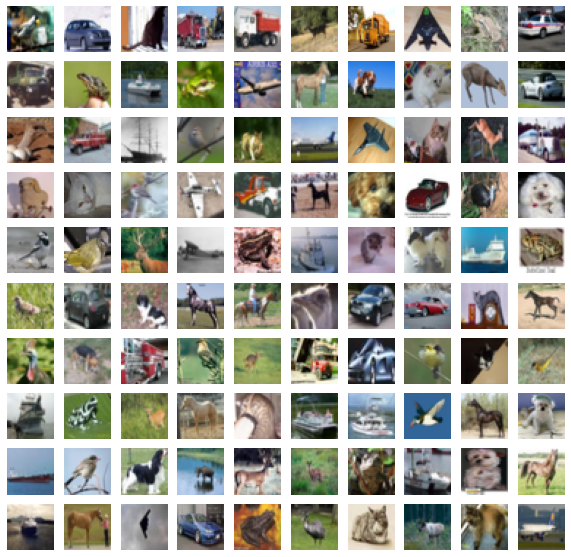

In [11]:
show_images(x_train)

<a id="section3"></a>
# <font color="#004D7F" size=5>Experimentos con redes neuronales densas</font>
A continuación, realizar 2 experimentos usando redes neuronales densas con las redes que se te indican en cada sección.

<a id="section3.1"></a>
# <font color="#004D7F" size=4>Experimento 1</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`
- Capa densa `Dense` con 10 neuronas y función de activación _ReLU_
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.01
- Función de error: `sparce_categorical_crossentropy`
- Métricas: `accuracy`
- Número de *epochs*: 20

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                30730     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 30,840
Trainable params: 30,840
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento
Se especifica el optimizador y se complila el modelo

In [14]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 3s 2ms/step - loss: 2.3061 - accuracy: 0.0982 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 2/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3042 - accuracy: 0.0997 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 3/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3040 - accuracy: 0.1004 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3041 - accuracy: 0.0996 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 5/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3037 - accuracy: 0.0996 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3037 - accuracy: 0.1011 - val_loss: 2.3033 - val_accuracy: 0.1000
Epoch 7/20
1563/1563 [==============================] - 2s 1ms/step - loss: 2.3041 - accuracy: 0.0971 - val_loss: 2.3031 - val_accuracy:

### Evaluar el modelo
Se evaluara el modelo para poder llegar a una conclusion, auqnue viendo la precision y la perdida de error en lso resultados anteriores no se ve amuy alentador a simple vista

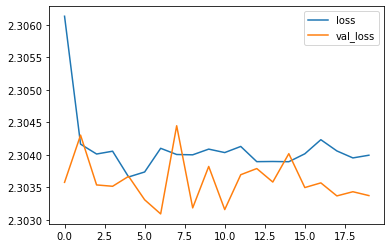

In [16]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

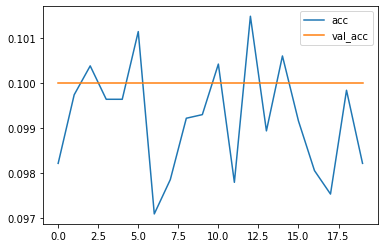

In [17]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas 

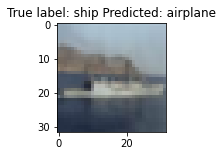

In [26]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

Al observar el valor de error que es muy alto, su disminucion es minima, el avlor de entrenamiento es mayor al de la validacion.
Con respecto a la precision esta con respecto al de entrenamiento fluctua mucho y queda muy por debajo que la validacion, cuanod deberia de ser al reves.

<a id="section3.2"></a>
# <font color="#004D7F" size=4>Experimento 2</font>

Arquitectura de la red:

- Capa de aplanado `Flatten` con entrada `(32,32,3)`.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 128 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 40

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                98336     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 110,058
Trainable params: 110,058
Non-trainable params: 0
_________________________________________________________________


### Entrenamiento
Se especifica el optimizador y se complila el modelo

In [29]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40)

Epoch 1/40
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8881 - accuracy: 0.3104 - val_loss: 1.7896 - val_accuracy: 0.3554
Epoch 2/40
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7661 - accuracy: 0.3587 - val_loss: 1.7814 - val_accuracy: 0.3534
Epoch 3/40
1563/1563 [==============================] - 2s 2ms/step - loss: 1.7351 - accuracy: 0.3721 - val_loss: 1.7145 - val_accuracy: 0.3838
Epoch 4/40
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7097 - accuracy: 0.3819 - val_loss: 1.6835 - val_accuracy: 0.3941
Epoch 5/40
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6947 - accuracy: 0.3869 - val_loss: 1.6989 - val_accuracy: 0.3865
Epoch 6/40
1563/1563 [==============================] - 2s 2ms/step - loss: 1.6824 - accuracy: 0.3923 - val_loss: 1.6821 - val_accuracy: 0.3933
Epoch 7/40
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6762 - accuracy: 0.3943 - val_loss: 1.6857 - val_accuracy:

### Evaluar el modelo
Se evaluara el modelo para poder llegar a una conclusion,  viendo la precision y la perdida de error en los resultados anteriores se ve medianamente alentador

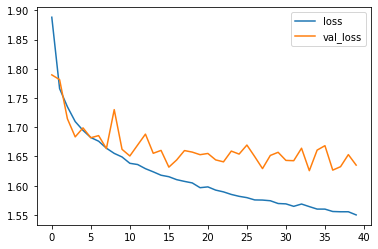

In [31]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

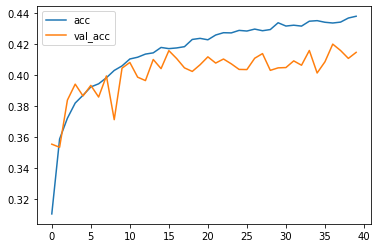

In [32]:
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas 

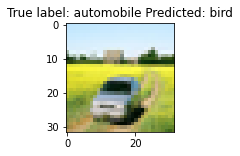

In [56]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

Al onservar los numeros se puede ver como el error va disminuyendo en cada epoch y la precision va aumentando, las graficas muestan buenos resultados pues ambos disminuyen y crecen respectivamente, al ver la precision es bueno tener el conjunto de validacion por debajo del train.
Tal vez la precision no sobrepase el 50% por lo que no se puede considerar ineficiente.
Los datos de validacion se estancan y empiezan a fluctuar

<a id="section4"></a>
# <font color="#004D7F" size=5>Experimentos con CNNs</font>
A continuación, realizar 2 experimentos usando redes convolucionales con las redes que se te indican en cada sección.

<a id="section4.1"></a>
# <font color="#004D7F" size=4>Experimento 3</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 16 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa densa `Dense` con 32 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.0001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 10

#### COMPLETAR: crear y entrena la red neuronal indicada arriba

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

#### Arquitectura de red


In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Configuracion de entrenamineto

In [58]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 265,834
Trainable params: 265,834
Non-trainable params: 0
________________________________________________

### Entrenamiento de red

In [59]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.9268 - accuracy: 0.3159 - val_loss: 1.7372 - val_accuracy: 0.3847
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6436 - accuracy: 0.4223 - val_loss: 1.5715 - val_accuracy: 0.4437
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5133 - accuracy: 0.4665 - val_loss: 1.4893 - val_accuracy: 0.4722
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4325 - accuracy: 0.4970 - val_loss: 1.4032 - val_accuracy: 0.4991
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3714 - accuracy: 0.5146 - val_loss: 1.3456 - val_accuracy: 0.5255
Epoch 6/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.3240 - accuracy: 0.5330 - val_loss: 1.3152 - val_accuracy: 0.5345
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2866 - accuracy: 0.5456 - val_loss: 1.2860 -

### Evaluar modelo
Se evalua el error

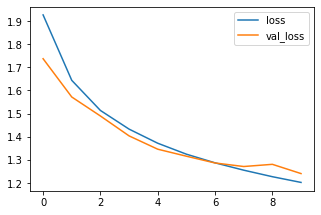

In [60]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

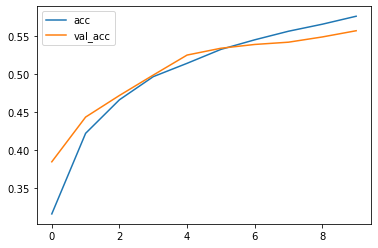

In [61]:
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas 

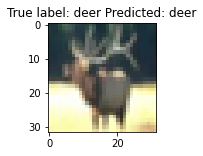

In [105]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

Al observar el entrenamiento de res el error y la precision disminuyen y aumentan respectivamente de manera muy optima, pasando la precision el 50%, lo cual nos indica que el modelo es "optimo", al compribar las graficas y tener conjunto de validacion por debajo del trian con poca diferencia nos dice que el modleo funciona adecuadamente

<a id="section4.2"></a>
# <font color="#004D7F" size=4>Experimento 4</font>

Arquitectura de la red:

- Capa convolucional `Conv2D` con 32 filtros/kernels, padding con relleno, activación *ReLU* y con entrada `(32,32,3)`
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa convolucional `Conv2D` con 64 filtros/kernels, padding con relleno y activación *ReLU*
- Capa pooling `MaxPool2D` con reducción de 2 tanto en tamaño como en desplazamiento (stride) y padding con relleno.
- Capa de aplanado `Flatten`.
- Capa densa `Dense` con 64 neuronas y función de activación _ReLU_.
- Capa de salida densa `Dense` con 10 neuronas y función de activación _Softmax_.

Configuración del entrenamiento:

- Optimizador: Adam con factor de entrenamiento 0.001
- Función de error: `sparce_categorical_crossentropy`.
- Métricas: `accuracy`.
- Número de _epochs_: 20


#### COMPLETAR: crear y entrena la red neuronal indicada arriba

### Creacion de modelo
Se crea el modelo con referencia a las especificaciones anteriores,es decir con el numero de capas que se especifican segun la arquitectura

#### Arquitectura de red


In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#### Configuracion de entrenamineto

In [107]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

### Entrenamiento de red

In [108]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 42s 26ms/step - loss: 1.4573 - accuracy: 0.4735 - val_loss: 1.1840 - val_accuracy: 0.5815
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0430 - accuracy: 0.6338 - val_loss: 1.0284 - val_accuracy: 0.6409
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9003 - accuracy: 0.6853 - val_loss: 0.9426 - val_accuracy: 0.6712
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8048 - accuracy: 0.7189 - val_loss: 0.8556 - val_accuracy: 0.6999
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7359 - accuracy: 0.7435 - val_loss: 0.8168 - val_accuracy: 0.7172
Epoch 6/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6812 - accuracy: 0.7624 - val_loss: 0.7899 - val_accuracy: 0.7302
Epoch 7/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6322 - accuracy: 0.7767 - val_loss: 0.8022 -

### Evaluar modelo
Se evalua el error

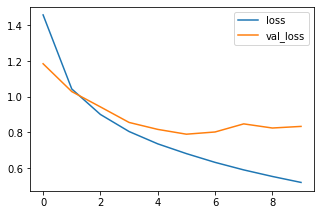

In [109]:
fig=plt.figure(figsize=(60, 40))
fig.add_subplot(10, 10, 2)
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

Se evalua la precision

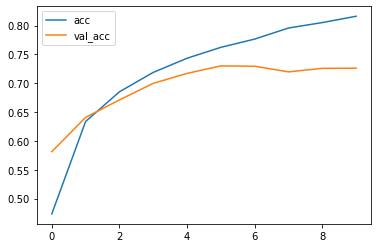

In [110]:
fig.add_subplot(10, 10, 1)
plt.plot(hist.history['accuracy'], label='acc')
plt.plot(hist.history['val_accuracy'], label='val_acc')
plt.legend()

plt.legend()
plt.show()

### Comprobacion
Se comprueba la precision o exactitud del modelo al poder categorizar la imagen, esto con el fin de tener algo mas grafico antes de sacar conclusiones, pues bien, si con los numeros ya es suficiente, compruebaprobar la exactitud no esta de mas.

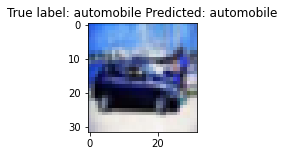

In [133]:
i = np.random.choice(range(0,x_test.shape[0]))
prediction = model.predict(np.array([x_test[i]])).argmax(axis=1)[0]

plt.figure(figsize=(2, 2))
plt.imshow(x_test[i])
plt.title("True label: %s Predicted: %s" % (labels[y_test[i][0]], labels[prediction]));

#### COMPLETAR: escribe un pequeño texto con los resultado obtenidos

Al examinar los epochs tan solo la validacion en el primero es muy cercano al 50% y al final pasa poo arriba del 80% y el error dsiminuye abruptamente casi un punto, por lo cual, es un modelo muy efieciente no solo por estar por encima del 50% si no porque tanto el error como la validacion son optimos y las graficas respaldan esto.

Los datos de validacion se estancan por lo caul podria haber sobre ajuste.

<a id="section4"></a>
# <font color="#004D7F" size=5>Parte Opcional</font>
Esta parte es totalmente opcional, se trata de realizar vuestra propia red neuronal con lo aprendido en clase para intentar mejorar lo aprendido en las anteriores redes o al menos acercarse a la red que mejor ha funcionado. El objetivo es que penséis en una posible red que creáis que puede funcionar y la pongáis en práctica para ver como funciona y expliquéis los resultados conseguido.

También os animos a que utilicéis otro tipo de capas que no hemos visto en clase (aquí tenéis todas: https://www.tensorflow.org/api_docs/python/tf/keras/layers). Y en especial os recomiendo la capa de tipo `Dropout` (podéis saber más sobre esta capa aquí y como utilizarla aquí: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

A grandes rasgos, la capa `Dropout` hace que determinadas neuronas no se activen/usen durante el proceso de entrenamiento en momentos determinados. De esta forma incitamos a que las neuronas que no aprenden tanto, lo hagan. De esta forma tenemos un entrenamiento más completo distribuido por todas las neuronas. Esta capa ayuda a evitar el problema de sobreajuste, es decir, que el entrenamiento sea demasiado ajustado al conjunto de *train* pero no sea tan óptimo en el conjunto de test.

La capa `Dropout` se suele utilizar después de las capas de *Pooling*, y el valor que se suele dar es entre 0.1 y 0.5, que es el porcentaje de neuronas de la capa anterior que de forma aleatoria no se activan para ser entrendada. Por ejemplo, una capa `Dropout` tiene este aspecto:

```
...
tf.keras.layers.Dropout(0.5)
...
```

Podés saber más sobre este tipo de capa en este artículo: https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [ ]:
#COMPLETAR: escribe aquí tu código

_COMPLETAR: ESCRIBE AQUÍ TU TEXTO_

<a id="section5"></a>
# <font color="#004D7F" size=5>Conclusión</font>
Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráis tus propias conclusiones.

El modelo mas optimo de los 4 que se elaboraron aqui es el cuarto experimento , el cual tiene el mayor porcentaje de precision y el menor error.El menos optimo seria el primer experimento debido a que se precision es igual o menor al 10%, por lo caul es ineficiente en todo aspecto. Con respecto a los otros 2 que rondan entre el 40% y el 50% (40<x<60) son buenos ya que ambos estan por el 50, sin embargo, no es lo mismo estar por arriba del 50 que por debajo.

## Dudas
¿Por que el factor de entrenamineto varia entre los modelos? de 0.001 en uno otro es 0.0001, esto no cambia los modelos con respecto al cual es el mas eficiente pero si cambia tanto la precision y el error que aumentan y disminuyen respectivamente 
<table style="width:100%">
  <tr>
    <th>Modelo</th>
    <th>Precision</th>
    <th>Validacion</th>
     <th>error</th>
  </tr>
  <tr>
    <td>3</td>
    <td>0.001</td>
    <td>0.6881</td>
    <td>0.8916</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0.0001</td>
    <td>0.6050</td>
     <td>1.1284 </td>
  </tr>
    <tr>
    <td>4</td>
    <td>0.001</td>
    <td>0.8260</td>
    <td>0.4930</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0.0001</td>
    <td>0.6559</td>
     <td>0.9885 </td>
  </tr>
</table>




<div style="text-align: center; font-size: 24px;">
    <img src="images/good-job.jpeg">
    <br>
    ¡Si has llegado hasta aquí deberías estar super orgullos@!
    <br><br>
    Ya puedes relajar tus neuronas, les has dado mucho trabajo
</div>